# Convert geometries of a geodataframe to vertices 
O. Kaufmann, 2021.

In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
from geometron.geometries import gdf_to_points_gdf

In [2]:
geo_interface = {"type": "FeatureCollection"}
features = []
bbox = (0., 1., 0., 1., 0., 8.)
geo_interface["bbox"] = bbox

In [3]:
features.append({'id':0, 'type': 'Feature', 'properties': {'comment': 'a 2D point'}, 'geometry': {'type': 'Point', 'coordinates': (1., 0.)}})
features.append({'id':1, 'type': 'Feature', 'properties': {'comment': 'a 3D point'}, 'geometry': {'type': 'Point', 'coordinates': (0., 1., 4.)}})
features.append({'id':2, 'type': 'Feature', 'properties': {'comment': 'a 2D linestring'}, 'geometry': {'type': 'LineString', 'coordinates': [(1., 1.), (1., 2.), (2., 2.)]}})
features.append({'id':3, 'type': 'Feature', 'properties': {'comment': 'a 3D linestring'}, 'geometry': {'type': 'LineString', 'coordinates': [(2., 3., 1.), (3., 3., 2.), (3., 4., 4.)]}})
features.append({'id':4, 'type': 'Feature', 'properties': {'comment': 'a 2D polygon'}, 'geometry': {'type': 'Polygon', 'coordinates': [[(3., 0.), (3., 1.), (4., 1.), (4., 0.), (3., 0.)]]}})
features.append({'id':5, 'type': 'Feature', 'properties': {'comment': 'a 3D polygon'}, 'geometry': {'type': 'Polygon', 'coordinates': [[(0., 3., 0.), (0., 4., 2.), (1., 4., 4.), (1., 3., 8.), (0., 3., 0.)]]}})

In [9]:
geo_interface["features"] = features
gdf = gpd.GeoDataFrame.from_features(geo_interface)
gdf

,geometry,comment
0,POINT (1.00000 0.00000),a 2D point
1,POINT Z (0.00000 1.00000 4.00000),a 3D point
2,"LINESTRING (1.00000 1.00000, 1.00000 2.00000, ...",a 2D linestring
3,"LINESTRING Z (2.00000 3.00000 1.00000, 3.00000...",a 3D linestring
4,"POLYGON ((3.00000 0.00000, 3.00000 1.00000, 4....",a 2D polygon
5,"POLYGON Z ((0.00000 3.00000 0.00000, 0.00000 4...",a 3D polygon


In [8]:
gdf_points = gdf_to_points_gdf(gdf, columns=['comment'])
gdf_points.tail()

,geometry,comment
13,POINT Z (0.00000 3.00000 0.00000),a 3D polygon
14,POINT Z (0.00000 4.00000 2.00000),a 3D polygon
15,POINT Z (1.00000 4.00000 4.00000),a 3D polygon
16,POINT Z (1.00000 3.00000 8.00000),a 3D polygon
17,POINT Z (0.00000 3.00000 0.00000),a 3D polygon


<AxesSubplot:>

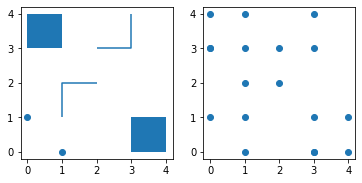

In [6]:
fig, ax = plt.subplots(ncols=2)
gdf.plot(ax=ax[0])
gdf_points.plot(ax=ax[1])